In [1]:
import sys
sys.path.append('../lib/')

from sandpipline import (get_all_rate_file_at_path,  
                         re_scale_shift_fctn_slice, 
                         create_continuous_alphaMap,
                         subtract_fct_alphabeta,
                         weight_row_fct_for_cbeta,
                         get_unique_function,
                         multipage)

import pickle
from astropy.io import fits
from os.path import isdir
from os import mkdir

%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib
plt.close("all")
plt.rcParams['text.usetex'] = True

cdpDir = '../DATA/mrs_distortion_fits/'
version = "flt7"

save_model = "../DATA/10LacModels/" # "../DATA/10LacModels/"


In [2]:
# --- Reads the SCI
have_a_save = True
science_data_dir = "../DATA/GQlup/sci_bfe_fringe_bkg"#../DATA/GQLup/sci_longshort/"
sci_pickel_name = "../DATA/GQLup_longshort"#"../DATA/sci_longshort_save1302"

if have_a_save:
    with open(sci_pickel_name, 'rb') as handle:
        saved_rate_infos = pickle.load(handle)
    cube_frame_sci, centers_list_sci, sigmas_list_sci, dith_type_sci, numdi_list_sci, name_list_sci, bandCHAN_sci = saved_rate_infos

else:
    cube_frame_sci, centers_list_sci, sigmas_list_sci, dith_type_sci, numdi_list_sci, name_list_sci, bandCHAN_sci = get_all_rate_file_at_path(science_data_dir,
                                                                                                                                              cdpDir,
                                                                                                                                              sci_pickel_name,
                                                                                                                                              map3to4=True,
                                                                                                                                              v=version,
                                                                                                                                              suff="_rate")


# Save in a new folder; create if do not exist
save_dir = science_data_dir[:-2]+"_psfsub/"
if not isdir(save_dir):
    mkdir(save_dir)
print(save_dir)

../DATA/GQlup/sci_bfe_fringe_b_psfsub/


In [3]:
dith_type_sci

array(['NEGATIVE3', 'NEGATIVE2', 'NEGATIVE3', 'NEGATIVE1', 'NEGATIVE2',
       'NEGATIVE4', 'NEGATIVE1', 'NEGATIVE1', 'NEGATIVE3', 'NEGATIVE1',
       'NEGATIVE4', 'NEGATIVE4', 'NEGATIVE2', 'NEGATIVE2', 'NEGATIVE2',
       'NEGATIVE3', 'NEGATIVE3', 'NEGATIVE1', 'NEGATIVE2', 'NEGATIVE4',
       'NEGATIVE1', 'NEGATIVE3', 'NEGATIVE4', 'NEGATIVE4'], dtype='<U9')

Procees frame 9
jw01640009001_06101_00001_mirifulong_rate.fits B34
Procees frame 10
jw01640009001_06101_00004_mirifushort_rate.fits B12


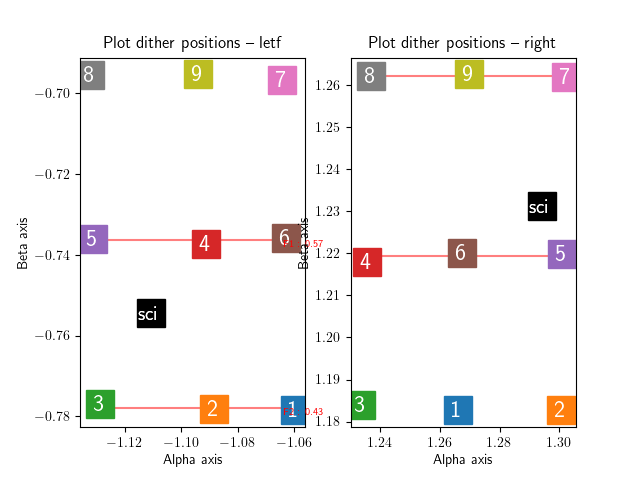

In [4]:
for kk in range(9,len(cube_frame_sci)):
    
    # We select one frame from the list of science rate file to process. 
    frame_sci = cube_frame_sci[kk] 
    type_sci = dith_type_sci[kk]
    centers_sci = centers_list_sci[kk]
    name_rate = name_list_sci[kk]
    bandsci = bandCHAN_sci[kk]
    sigmas_sci = sigmas_list_sci[kk]
    
    print("Procees frame "+str(kk))
    print(name_rate+" "+bandsci)

    # Load the model
    if type_sci!="None1":
        with open(save_model+bandsci+"_"+type_sci, 'rb') as handle:
            models_dict = pickle.load(handle)
    else :       
        with open(save_model+bandsci+"_"+dith_type_sci[kk-1], 'rb') as handle:
            models_dict = pickle.load(handle)

    # Rescale and subtract
    if "4" in bandsci : 
        continue
        residual = subtract_fct_alphabeta(models_dict["list_function_L"], models_dict["list_function_R"], frame_sci, centers_sci, bandsci, cdpDir, version, show=name_rate)
    else :
        X_coor = create_continuous_alphaMap(bandsci, cdpDir, v=version, show=False)
        
    
        function_L, function_R = weight_row_fct_for_cbeta(models_dict, centers_sci, show="Centroids "+name_rate, typesci=type_sci) # For 9dither pattern
        # function_L, function_R = get_unique_function(models_dict, centers_sci, show="Centroids "+name_rate) # If only 1 dither
        break
        #residual, interpol_img = re_scale_shift_fctn_slice(X_coor, function_L, function_R, frame_sci, centers_sci, show="Rescaling mixed "+name_rate)
    
    
    #  -- Load original file, re-write in in a new folder with updating data to residual
    # This is to we keep the headers.
    # hdul = fits.open(science_data_dir+"/"+name_rate)
    # hdul.verify('ignore')
    # hdul[1].data = residual

    # hdul.writeto(save_dir+name_rate, overwrite=True)

    # multipage(save_dir[:-1]+"_pfssub10LAX_res"+".pdf")
    